In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf

In [4]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.1.0-rc1


In [4]:
#pip install tensorflow==2.0.0


     |████████████████████████████████| 86.3MB 107kB/s 
     |████████████████████████████████| 450kB 57.1MB/s 
     |████████████████████████████████| 3.8MB 38.4MB/s 
     |████████████████████████████████| 81kB 13.5MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
#if pybind11 is not installed
pip install pybind11

     |████████████████████████████████| 153kB 2.7MB/s 


In [2]:
#Connect to our own Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
#Go on the DL project folder
%cd "/content/gdrive/My Drive/DeepLearningProject/"
!ls

/content/gdrive/My Drive/DeepLearningProject
Board.h					input_data.npy
Compare_models_performances.ipynb	ls.sh
compileMAC.sh				models
compile.sh				policy.npy
DL_Proj_Corentin.ipynb			__pycache__
end.npy					README
Game.h					Rzone.h
games.data				save.py
generators.py				Untitled1.ipynb
golois.cpp				utils.py
golois.cpython-36m-x86_64-linux-gnu.so	value.npy
golois.py				Vincent_learning.ipynb
histories


In [0]:
import os

#%aimport models
import utils
import generators

In [0]:
#To compile golois.cpp
! c++ -O3 -Wall -shared -std=c++11 -fPIC `python3 -m pybind11 --includes` golois.cpp -o golois`python3-config --extension-suffix`

In file included from golois.cpp:17:0:
Board.h: In member function ‘bool Board::isCapturedLadder(int, int, Rzone*)’:
Board.h:1742:8: warning: unused variable ‘n1’ [-Wunused-variable]
    int n1 = nbLiberties (inter, liberties1, stones1, 3);
        ^~
Board.h:1763:12: warning: unused variable ‘n1’ [-Wunused-variable]
        int n1 = nbLiberties (inter, liberties1, stones1, 3);
            ^~
Board.h: In member function ‘void Board::computeLadders(int)’:
Board.h:1792:9: warning: unused variable ‘other’ [-Wunused-variable]
     int other = opponent (color);
         ^~~~~
Board.h: In member function ‘void Board::computeAllLadders(int, bool)’:
Board.h:2038:9: warning: unused variable ‘n1’ [-Wunused-variable]
     int n1 = nbLiberties (i, liberties1, stones1);
         ^~
Board.h:2074:7: warning: unused variable ‘n1’ [-Wunused-variable]
   int n1 = nbLiberties (i, liberties1, stones1);
       ^~
Board.h:2107:9: warning: unused variable ‘n1’ [-Wunused-variable]
     int n1 = nbLiberties (i

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from datetime import datetime
import os
import golois

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2


planes = 8
moves = 361
dynamicBatch = True
if dynamicBatch:
    
    generator = generators.GoloisSequence(N=200000,
                                          batch_size=32,
                                          change_batch=5,
                                          planes=planes,
                                          moves=moves)
    input_data_val = np.load ('input_data.npy')
    policy_val = np.load ('policy.npy')
    value_val = np.load ('value.npy')
    end_val = np.load ('end.npy')
    """
    N = 100000
    input_data = np.random.randint(2, size=(N, 19, 19, planes))
    input_data = input_data.astype ('float32')
    
    policy = np.random.randint(moves, size=(N,))
    policy = keras.utils.to_categorical (policy)
    
    value = np.random.randint(2, size=(N,))
    value = value.astype ('float32')
    
    end = np.random.randint(2, size=(N, 19, 19, 2))
    end = end.astype ('float32')

    golois.getBatch (input_data, policy, value, end)
    """
else:
    input_data = np.load ('input_data.npy')
    policy = np.load ('policy.npy')
    value = np.load ('value.npy')
    end = np.load ('end.npy')


#Name of the model, to save it later
now = datetime.now()
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'dl_proj_model_' + date_time + '.h5'



In [7]:
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, ZeroPadding2D
from tensorflow.keras import regularizers

#x = Activation(tf.keras.layers.LeakyReLU(alpha=0.25))(x)
#weight_decay = 1e-4

input = keras.Input(shape=(19, 19, planes), name='board')

x = layers.Conv2D(64, 3, padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = layers.Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

x = layers.Conv2D(34, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

ident = x
x = layers.Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = layers.Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)
x = layers.add([ident,x])
ident2 = x
x = layers.Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = layers.Conv2D(128, 3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.4)(x)
x = layers.add([ident2,x])

policy_head = layers.Conv2D(2, 1, padding='same')(x)
policy_head = BatchNormalization()(policy_head)
policy_head = Activation('relu')(policy_head)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)

value_head = layers.Conv2D(32, 3, padding='same')(x)
value_head = Activation('relu')(value_head)
value_head = layers.Conv2D(1, 1, padding='same')(value_head)
value_head = Activation('relu')(value_head)
value_head = layers.ZeroPadding2D(padding=(1, 1))(value_head)
value_head = layers.AveragePooling2D(strides=2)(value_head)
value_head = layers.ZeroPadding2D(padding=(1, 1))(value_head)
value_head = layers.AveragePooling2D(strides=2)(value_head)
value_head = layers.Conv2D(1, 1, padding='same')(value_head)
value_head = layers.Flatten()(value_head)
value_head = layers.Dense(256, activation='relu')(value_head)
value_head = layers.Dense(10, activation='sigmoid')(value_head)
value_head = layers.Dense(1, activation='tanh', name='value')(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])
model.summary()

#Name of the model, to save it later
now = datetime.now()
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'dl_proj_model_' + date_time + '.h5'

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
board (InputLayer)              [(None, 19, 19, 8)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 19, 19, 34)   2482        board[0][0]                      
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 19, 19, 34)   136         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 19, 19, 34)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
#pip install keras-adabound

  Created wheel for keras-adabound: filename=keras_adabound-0.5.0-cp36-none-any.whl size=6420 sha256=bd88408afa0be272d529d4dd24a66f116672bec0b3af17fbdf531b7ffc388da0
  Stored in directory: /root/.cache/pip/wheels/ac/8d/f7/33776ea7ac99b7faf02c27f1be6c129365c0d68799e227021d
Successfully built keras-adabound


In [8]:
#from keras_adabound import AdaBound

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

model_path = os.path.join(save_dir, model_name)
#Save only the best model
#Problem : multiple output // j'ai pas encore vu comment checker les deux outputs
model_save = ModelCheckpoint(model_path, monitor='val_policy_accuracy', verbose=1, save_best_only=True, mode='max')
#Avoid wasting time
earlyStopping = EarlyStopping(monitor="val_policy_accuracy",patience=15)
callbacks_list = [model_save, earlyStopping]

model.compile(optimizer='Adam',
              loss={'policy': 'categorical_crossentropy','value': 'mse'},loss_weights=[0.01, 10],metrics=["accuracy"])

"""
history = model.fit(input_data, {'policy': policy, 'value': value},
           epochs=15, batch_size=32, validation_split=0.2, callbacks=callbacks_list)
"""
history = model.fit_generator(generator,
          epochs=20, validation_data=(input_data_val, (policy_val, value_val)), shuffle = False,
          callbacks=callbacks_list)

print("Saved model : " + model_path)


Train on 80000 samples, validate on 20000 samples
Epoch 1/15
79904/80000 [============================>.] - ETA: 0s - loss: 2.4585 - policy_loss: 5.7348 - value_loss: 0.2401 - policy_accuracy: 0.0079 - value_accuracy: 0.6026
Epoch 00001: val_policy_accuracy improved from -inf to 0.01220, saving model to /content/gdrive/My Drive/DeepLearningProject/models/dl_proj_model_12-19-2019_15-55-16.h5
80000/80000 [==============================] - 39s 484us/sample - loss: 2.4585 - policy_loss: 5.7344 - value_loss: 0.2401 - policy_accuracy: 0.0079 - value_accuracy: 0.6026 - val_loss: 2.4721 - val_policy_loss: 5.5844 - val_value_loss: 0.2416 - val_policy_accuracy: 0.0122 - val_value_accuracy: 0.5939
Epoch 2/15
79936/80000 [============================>.] - ETA: 0s - loss: 2.4425 - policy_loss: 4.8485 - value_loss: 0.2394 - policy_accuracy: 0.0559 - value_accuracy: 0.6034
Epoch 00002: val_policy_accuracy improved from 0.01220 to 0.07885, saving model to /content/gdrive/My Drive/DeepLearningProject/m

KeyboardInterrupt: ignored

In [0]:
#Run and evaluate  the last
import glob
from tensorflow.keras.models import load_model

#Take the latest_file, i.e. the latest model
save_dir = os.path.join(os.getcwd(), 'models')
save_dir = save_dir+'/*'
list_of_files = glob.glob(save_dir) 
latest_file = max(list_of_files, key=os.path.getctime)
model_name = latest_file

model_path = model_name
model = load_model(model_path)
model.summary()

#score = model.evaluate(x_test,y_test,batch_size=64,verbose = 0)
#print ('Validation accuracy', model.metrics_names, score)

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
board (InputLayer)              [(None, 19, 19, 8)]  0                                            
__________________________________________________________________________________________________
conv2d_271 (Conv2D)             (None, 19, 19, 38)   2774        board[0][0]                      
__________________________________________________________________________________________________
batch_normalization_253 (BatchN (None, 19, 19, 38)   152         conv2d_271[0][0]                 
__________________________________________________________________________________________________
activation_253 (Activation)     (None, 19, 19, 38)   0           batch_normalization_253[0][0]    
___________________________________________________________________________________________

NameError: ignored

In [0]:
import glob
from tensorflow.keras.models import load_model

#Take the latest_file, i.e. the latest model
save_dir = os.path.join(os.getcwd(), 'models')
save_dir = save_dir+'/'
files = save_dir+'dl_proj_model_12-10-2019_19-29-42.h5'
#files = save_dir+'dl_proj_model_12-10-2019_18-59-19.h5'
model_name = files

model_path = model_name
model = load_model(model_path)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
board (InputLayer)              [(None, 19, 19, 8)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 19, 19, 42)   3066        board[0][0]                      
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 19, 19, 42)   168         conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 19, 19, 42)   0           batch_normalization_8[0][0]      
____________________________________________________________________________________________

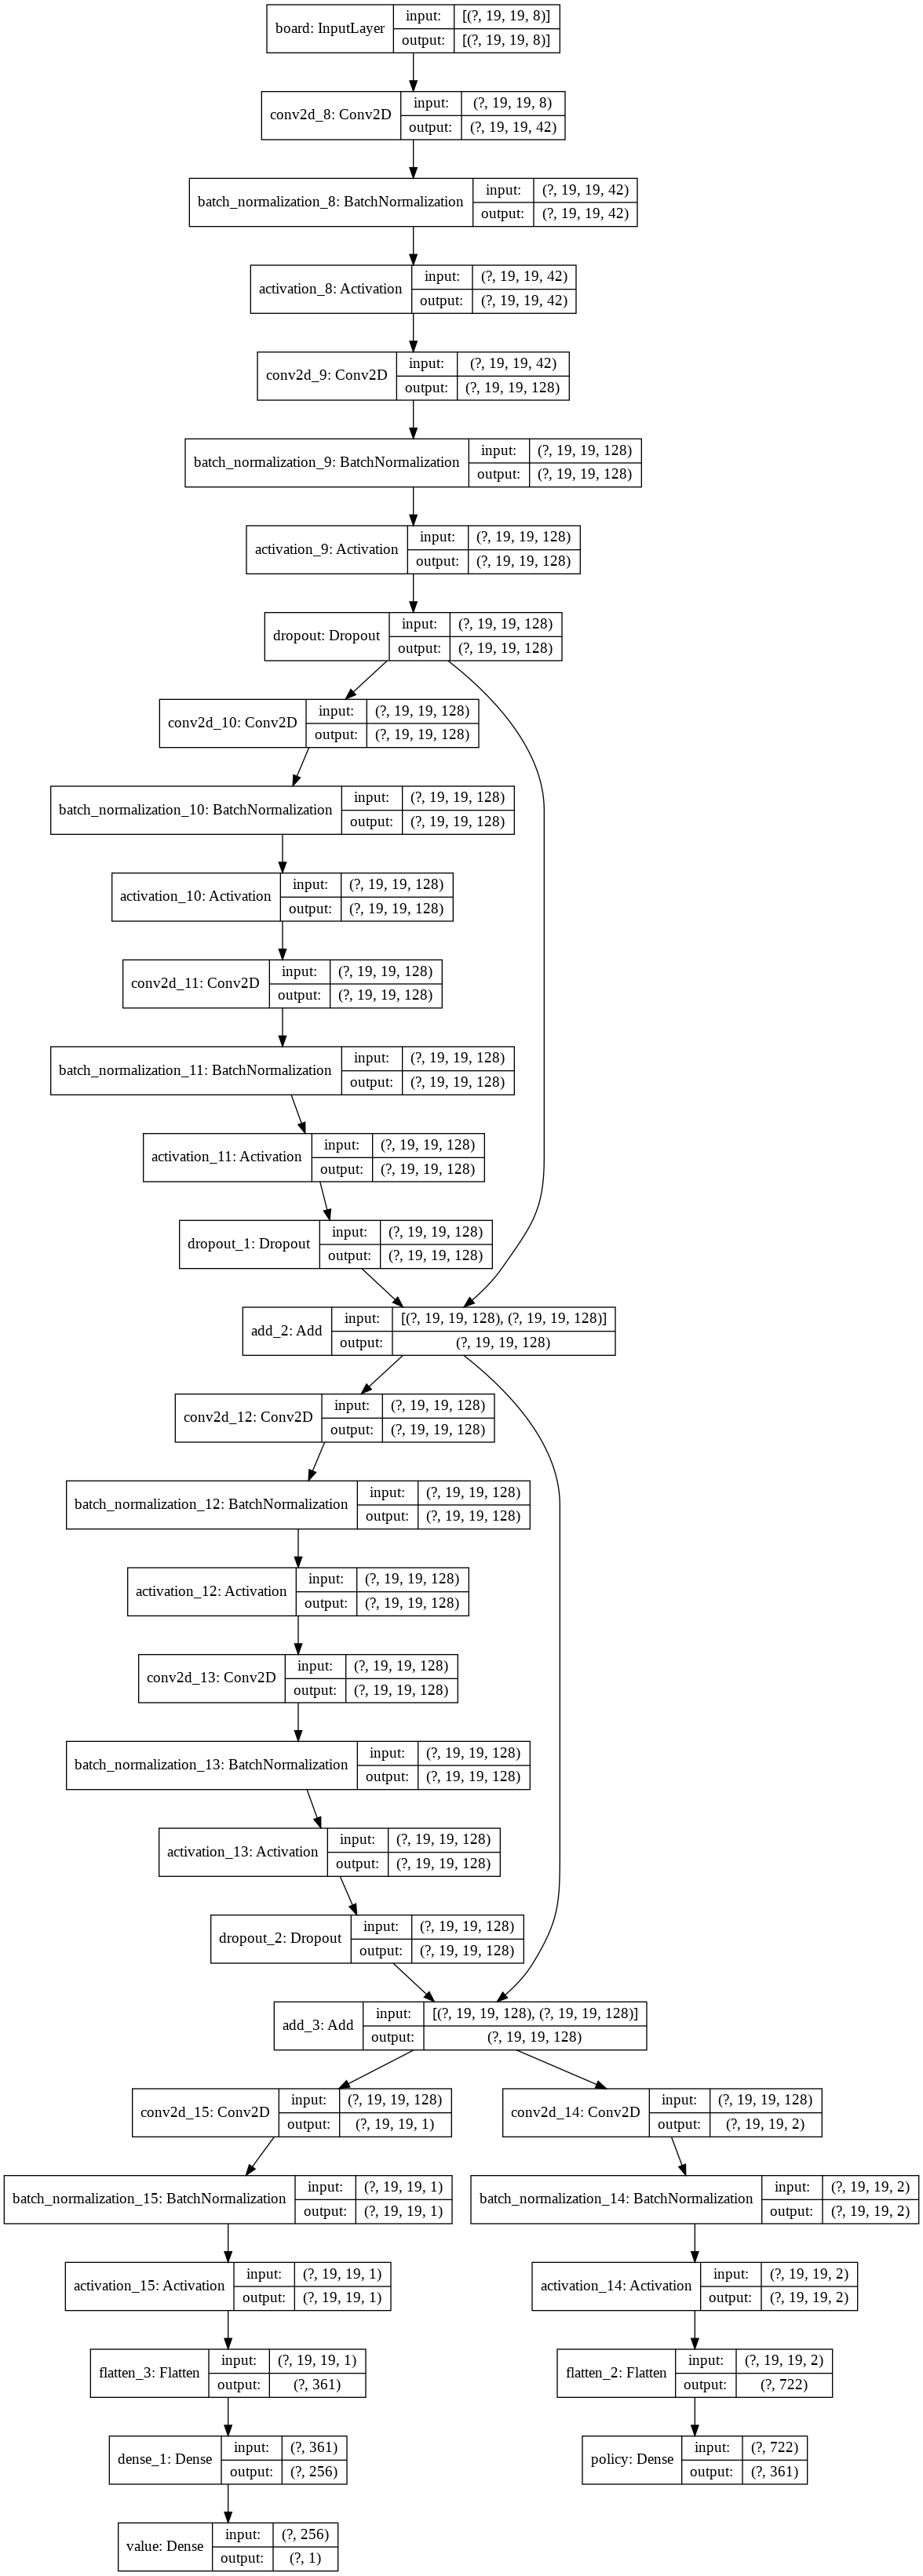

In [0]:
keras.utils.plot_model(model, show_shapes=True)